Rzuty monetą: 

[https://docs.google.com/spreadsheets/d/1eI8uGEHNUZptv2wbNQdXLQTwQndGUstGFmtZ4VWNqWY/edit?usp=sharing]

In [1]:
import pandas as pd
URLCSV = "https://docs.google.com/spreadsheets/d/1eI8uGEHNUZptv2wbNQdXLQTwQndGUstGFmtZ4VWNqWY/export?format=csv"
dane = pd.read_csv(URLCSV)
print(dane.head())

   LP                                              rzuty  fake  score  \
0   1  OOOOROORRRRRRORORORROOOORORRRRORROOOROORRRROOO...     1    565   
1   2  OOROOORRORRROOROROORROROOOORORROOORRORRROROORO...     1    408   
2   3  ORORORORRORORORORRORORRROOOROOROOOORRRROOROORO...     1    513   
3   4  OORORROOORRROOORROOOORRROOORRORROORRORRORRORRR...     1    333   
4   5  OORORRROROROOORRORRORROOORORROOORORORROORROOOR...     1     88   

   pierwszy_O  liczba_serii  liczba_O  max_seria  runtest_z      sd10  \
0           1            49        49          6  -0.297627  0.128668   
1           1            57        53          5   1.145949  0.082327   
2           1            56        52          9   0.922152  0.139841   
3           1            53        49          4   0.305671  0.087560   
4           1            64        48          3   2.532898  0.078881   

   sum_2max  sum_3max  sum_4max  sum_5max  sum_6max  sum_7max  count_1  
0        11        15        19        23        

In [5]:
import numpy as np
mask = dane['fake']==1
print("Średnia maksymalna długość serii dla udawanych rzutów monetą. ")
np.mean(dane['max_seria'][mask])

Średnia maksymalna długość serii dla udawanych rzutów monetą. 


np.float64(4.866666666666666)

In [6]:
print("Średnia maksymalna długość serii dla generowanych rzutów monetą. ")
np.mean(dane['max_seria'][~mask])

Średnia maksymalna długość serii dla generowanych rzutów monetą. 


np.float64(6.907)

Przedział ufności dla średniej maksymalnej serii:

- dla rzutów wymyślonych przez studentów

- dla rzutów generowanych z generatora liczb losowych

In [8]:
import numpy as np
from scipy import stats

# Przedział ufności (dane wymyślone przez Studentów)
data = dane['max_seria'][mask]
test_result = stats.ttest_1samp(data, popmean=np.mean(data))
conf_int = test_result.confidence_interval(0.95)
print(conf_int)

ConfidenceInterval(low=np.float64(4.26430124154635), high=np.float64(5.469032091786983))


In [9]:
# Przedział ufności (dane wygenerowane)
data = dane['max_seria'][~mask]
test_result = stats.ttest_1samp(data, popmean=np.mean(data))
conf_int = test_result.confidence_interval(0.95)
print(conf_int)

ConfidenceInterval(low=np.float64(6.795377667597976), high=np.float64(7.018622332402024))


In [16]:
x = dane['max_seria'][mask]
y = dane['sd10'][mask]
correlation_test = stats.pearsonr(x, y)
confidence_interval = correlation_test.confidence_interval(0.95)
print('Test:\n\n', correlation_test, '\n\n Confidence interval: \n\n', confidence_interval)

Test:

 PearsonRResult(statistic=np.float64(0.6049659356880157), pvalue=np.float64(0.0003979244992231663)) 

 Confidence interval: 

 ConfidenceInterval(low=np.float64(0.3128916349674376), high=np.float64(0.7925076373877))


In [17]:
import pandas as pd
URLCSV = "https://docs.google.com/spreadsheets/d/1Fuj72q5oIxLK74jBfdvI9pNr5Er2rPONfwh3szMq6-Q/export?format=csv"
dane = pd.read_csv(URLCSV)
print(dane.head())

   height  handedness  right_hand_span  left_hand_span  head_circ eye_colour  \
0     159        0.88             19.0            19.0       54.0       Blue   
1     160       -1.00             19.0            20.0       57.0      Green   
2     161        0.79             17.0            16.5       57.0      hazel   
3     161        1.00             17.0            17.5       54.0       Blue   
4     162        0.79             16.0            16.0       57.0       gray   

   gender  siblings  movies  soda   bedtime       fb_freq  fb_friends  \
0  Female         2     3.0   7.0  02:00:00    once a day       135.0   
1  Female         2     0.5   2.0  04:30:00             0         1.0   
2  Female         3     3.0   2.0  23:50:00   once a week       354.0   
3  Female         2     2.0   0.5  23:00:00    once a day       200.0   
4  Female         2     0.0   2.0  23:10:00  almost never       192.0   

                  stat_likert  
0  Neither agree nor disagree  
1              S

In [18]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

In [20]:
print("d Cohena między płciami dla wzrostu:")
print(cohen_d(dane['height'][dane['gender']=="Male"], 
              dane['height'][dane['gender']=="Female"]))

d Cohena między płciami dla wzrostu:
1.985625813717499


In [34]:
FEM = dane['height'][dane['gender']=="Female"].reset_index(drop=True)
MAL = dane['height'][dane['gender']=="Male"].reset_index(drop=True)

cohen_d(MAL, FEM)

np.float64(1.985625813717499)

In [47]:
nsim = 1000
n1=len(MAL)
n2=len(FEM)
def sim():
    indices1 = np.random.choice(n1, n1, replace=True)
    bootstrap_sample1 = MAL.iloc[indices1]
    indices2 = np.random.choice(n2, n2, replace=True)
    bootstrap_sample2 = FEM.iloc[indices2]
    return(cohen_d(bootstrap_sample1, bootstrap_sample2))

results = [sim() for _ in range(nsim)]
np.quantile(results, [0.025, 0.975])

array([1.53559842, 2.72684519])

(array([ 13.,  65., 226., 326., 203., 112.,  37.,  16.,   1.,   1.]),
 array([1.21259997, 1.43659014, 1.66058031, 1.88457047, 2.10856064,
        2.3325508 , 2.55654097, 2.78053114, 3.0045213 , 3.22851147,
        3.45250163]),
 <BarContainer object of 10 artists>)

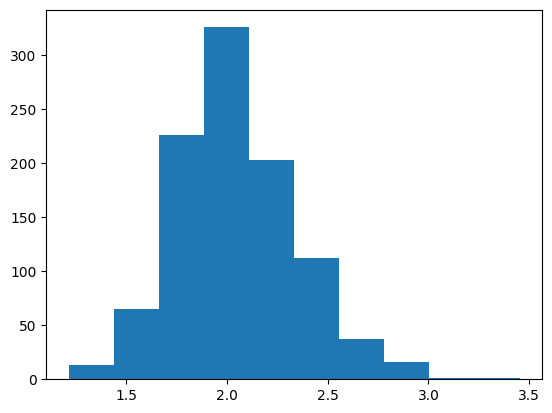

In [40]:
import matplotlib.pyplot as plt
plt.hist(results)